In [163]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pytesseract

In [164]:
print("Welcome to Car Recognition Phase One")
print(cv2.__version__)


Welcome to Car Recognition Phase One
4.2.0


In [165]:
def plot_images(img1,img2,title1="",title2=""):
    fig=plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)   
    
    ax2=fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [166]:
path="./images/first_car.png"

In [167]:
image = cv2.imread(path)

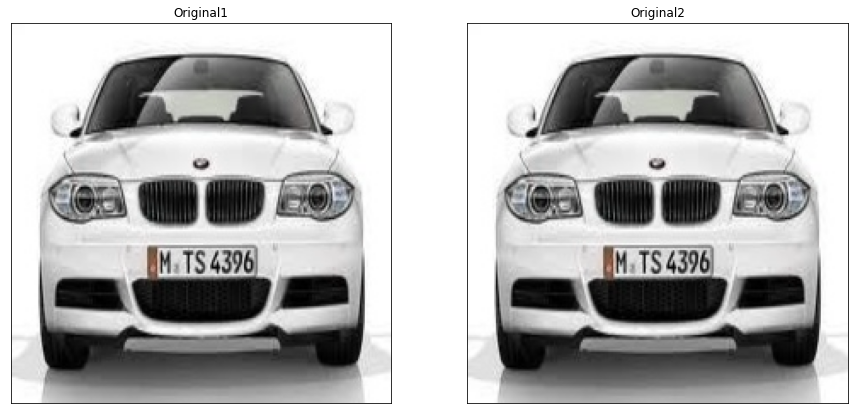

In [168]:
plot_images(image,image, title1="Original1", title2="Original2")

In [169]:
gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

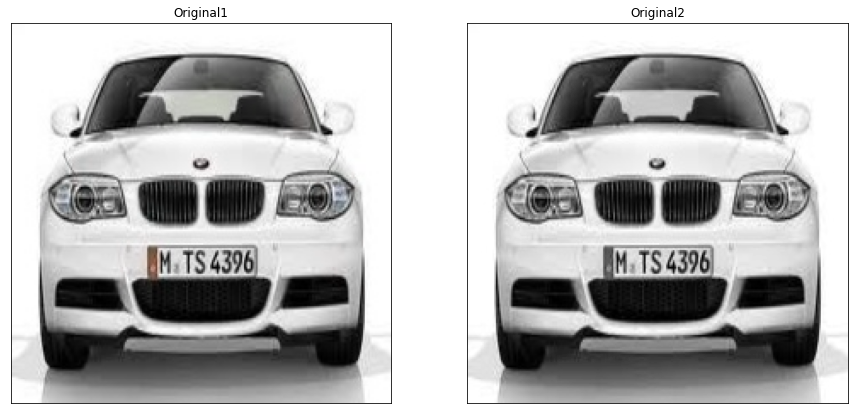

In [170]:
plot_images(image,gray, title1="Original1", title2="Original2")

In [171]:
blur= cv2.bilateralFilter(gray,11,99,90)

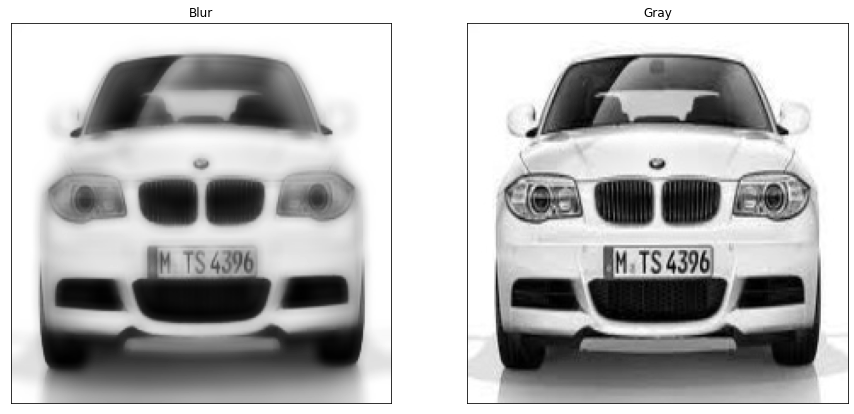

In [172]:
plot_images(blur,gray, title1="Blur", title2="Gray")

In [173]:
#Edge Detection
#Canny Edge Detection

edges = cv2.Canny(blur, 30,200)


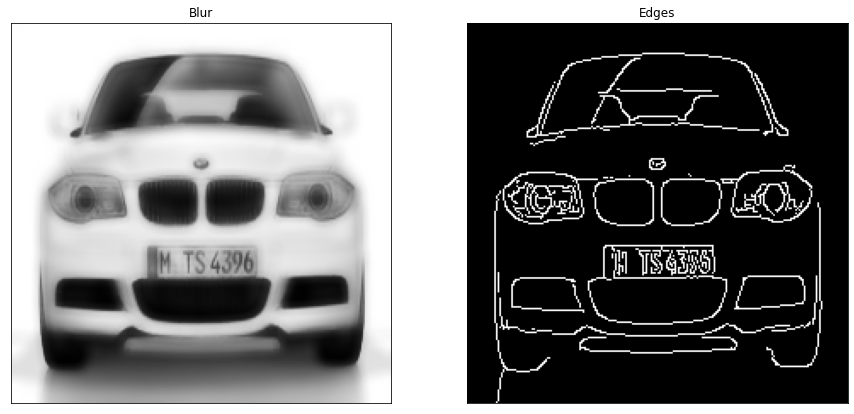

In [174]:
plot_images(blur,edges, title1="Blur", title2="Edges")

In [175]:
#Determine the contours in the image
cnts, new= cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


In [176]:
image_copy= image.copy()

In [177]:
_=cv2.drawContours(image_copy,cnts, -2,(255,0,255),5 )

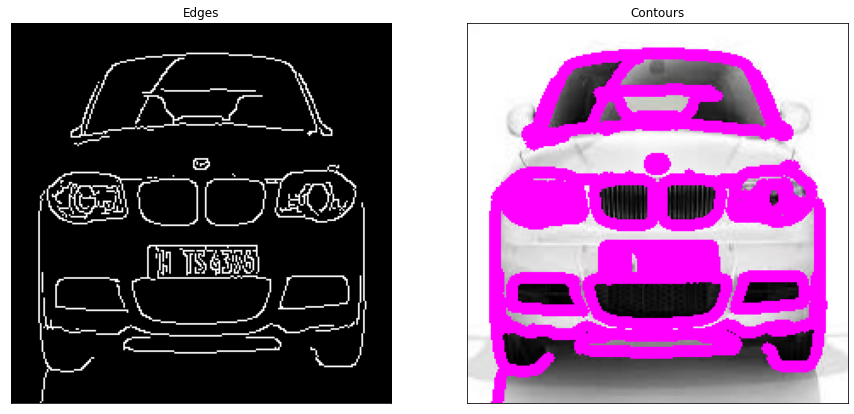

In [178]:
plot_images(edges,image_copy, title1="Edges", title2="Contours")

In [179]:
print(len(cnts))

64


In [180]:
cnts= sorted(cnts, key=cv2.contourArea, reverse=True)[:30]


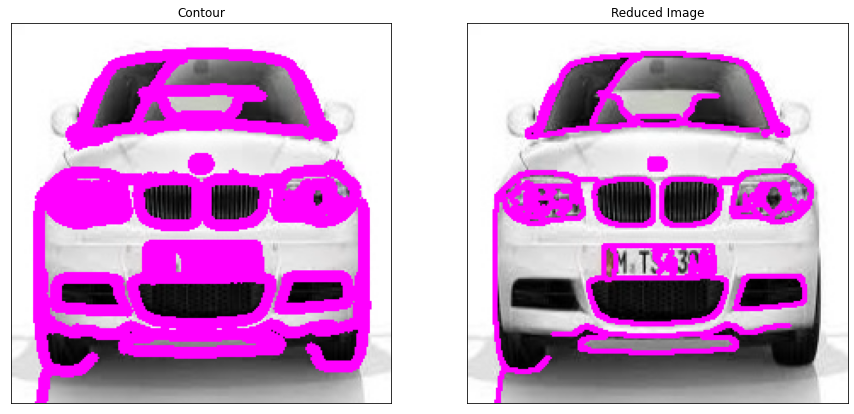

In [182]:
image_reduced_cnts=image.copy()
_=cv2.drawContours(image_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_reduced_cnts,title1="Contour" , title2="Reduced Image")

In [183]:
print(len(cnts))

30


In [184]:
plate=None
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    edges_count=cv2.approxPolyDP(c, 0.02*perimeter,True)
    if len(edges_count)==4:
        x,y,w,h=cv2.boundingRect(c)
        plate=image[y:y+h,x:x+w]
        break

cv2.imwrite("./Cropped_Images/firt_car.png",plate)
        

True

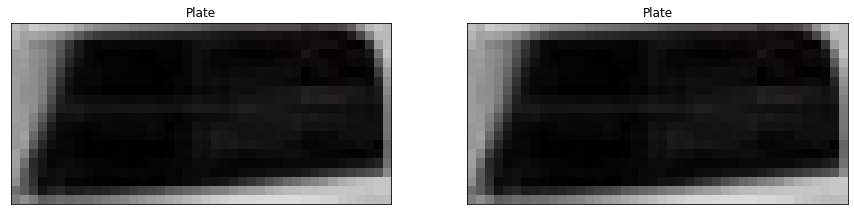

In [185]:
plot_images(plate,plate, title1="Plate", title2="Plate")

In [186]:
import pytesseract
test = pytesseract.image_to_string(plate, lang="eng")
print(test)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH